<a href="https://colab.research.google.com/github/karanbhatt1/MachineLearning/blob/main/LinearRegHandsOn06_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA- > Exploratory data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# EDA

In [ ]:
# Check for null values, check for duplicate values, get brief info about this dataset,
# check for number of rows and columns in this dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()

52

In [ ]:
# I want to check how many people are smoker and how many people are non-smoker.
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df.duplicated().sum()

0

In [ ]:
# If we have null values of numerical column we will replace it with mean or median.
# If we have null values of categorical column we will replace it with mode.

In [ ]:
col_list = list(df.columns)
print(col_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges']


In [ ]:
for x in col_list:
  if df[x].dtypes=='object':  #It means the column is categorical:
    df[x].fillna(df[x].mode()[0],inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)

<ipython-input-15-ef7766b19383>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)
<ipython-input-15-ef7766b19383>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


# Outliers Detection

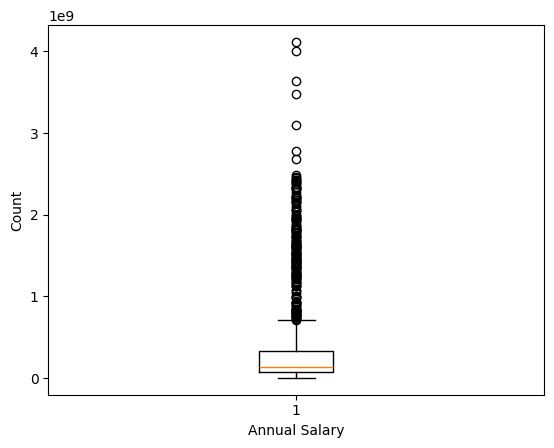

In [ ]:
plt.boxplot(df['Anual_Salary'])
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

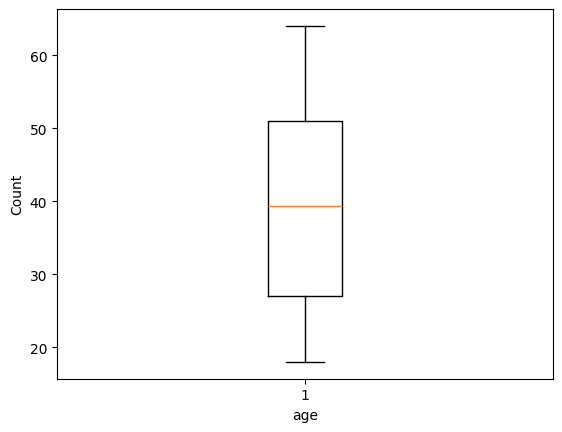

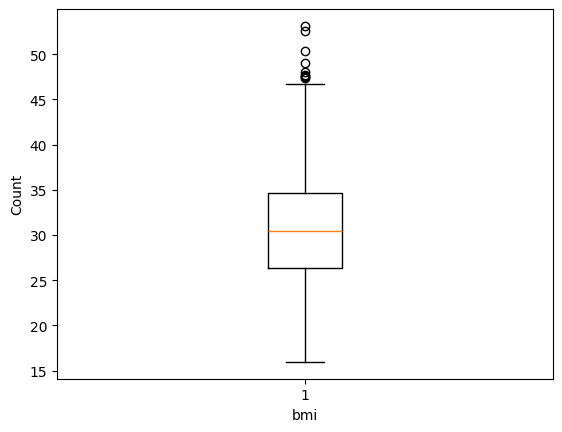

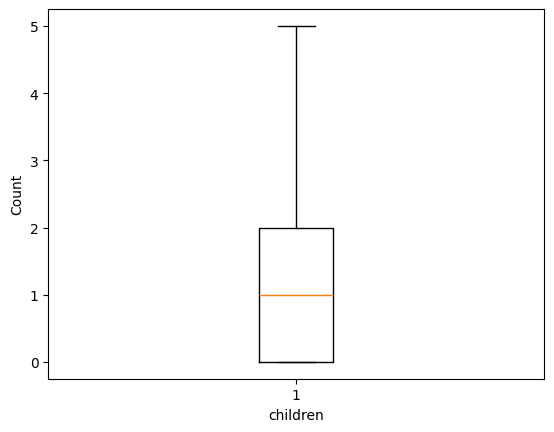

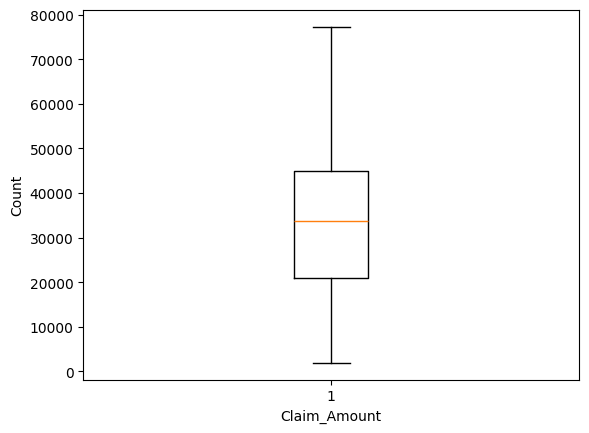

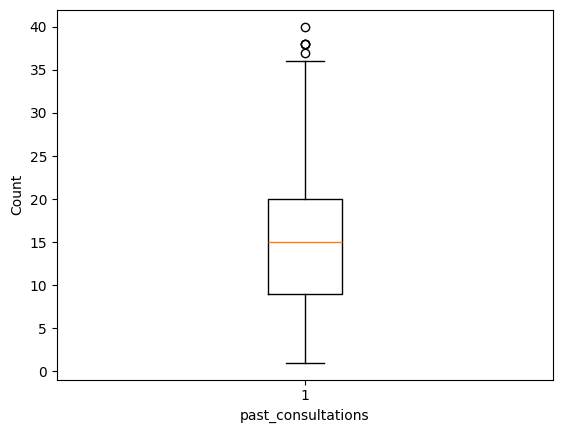

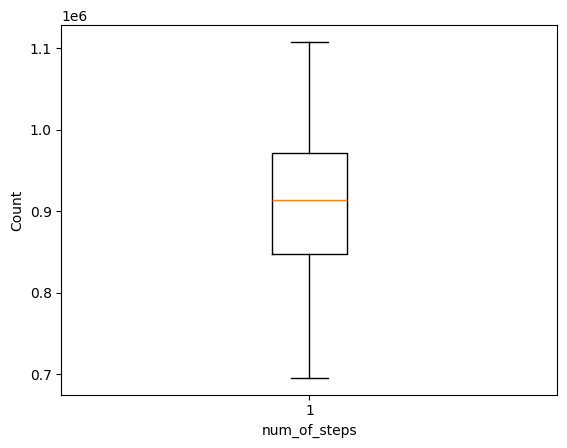

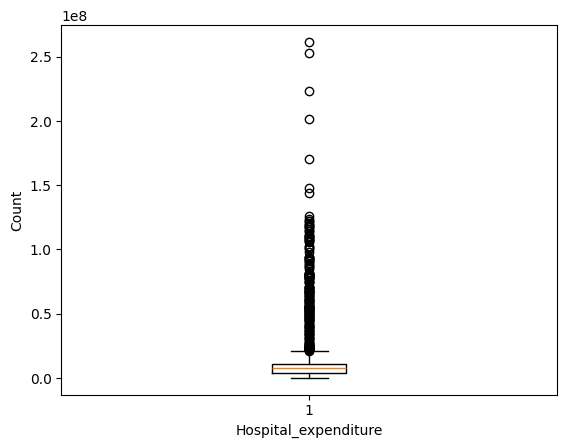

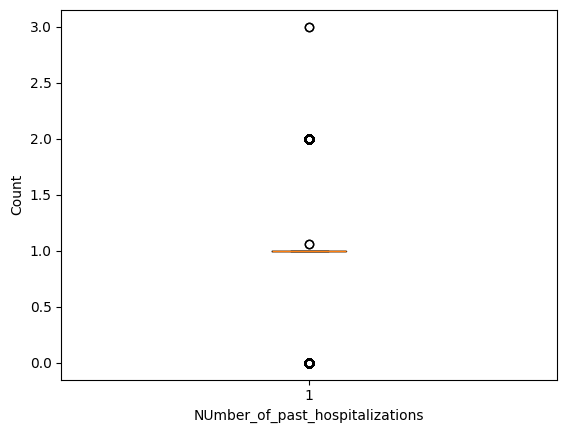

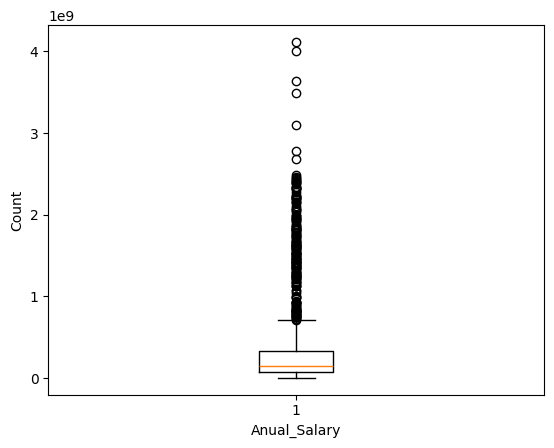

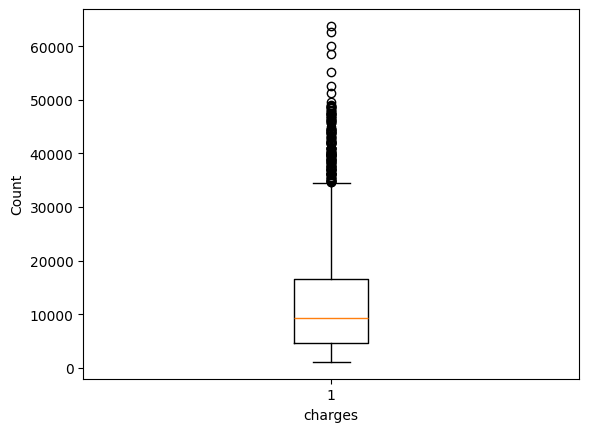

In [ ]:
for x in col_list:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel('Count')
  plt.show()

Now we have detected that we have outliers in our dataset.
Now we need to deal with them(remove them)

In [ ]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3-Q1   # Inter Quartile Range.
print(Q1)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound,upper_bound)
df = df[(df.bmi>=lower_bound) & (df.bmi<=upper_bound)]

26.03
13.925 46.205


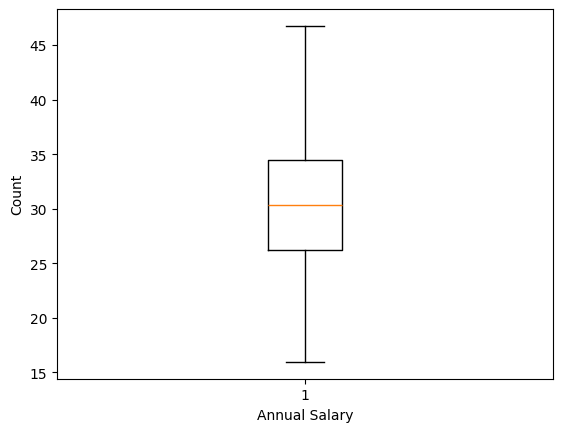

In [ ]:
plt.boxplot(df['bmi'])
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
# Now you have to remove outliers from rest of the columns expect the charges(target column).

In [ ]:
for x in col_list:
  if df[x].dtypes=='object' or x =='charges':
    continue

  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  IQR = Q3-Q1   # Inter Quartile Range.
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df = df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]


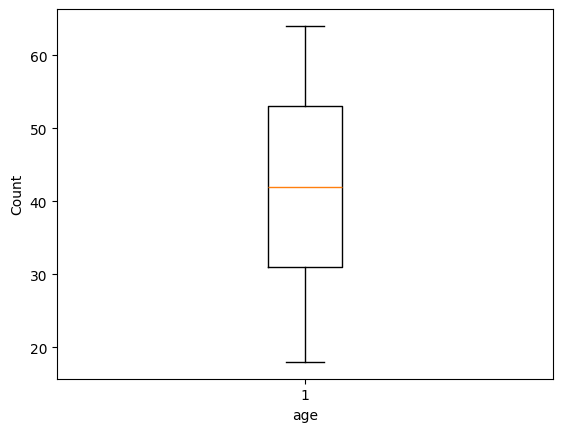

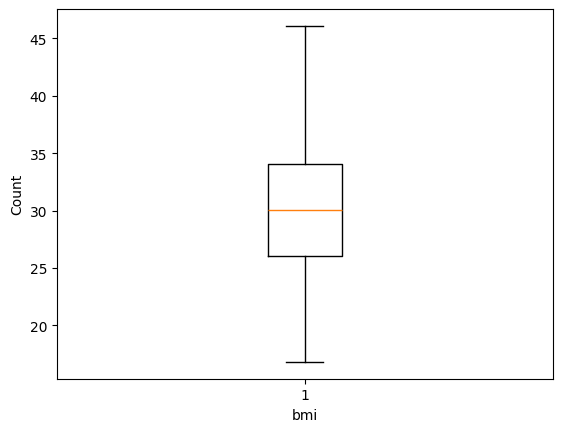

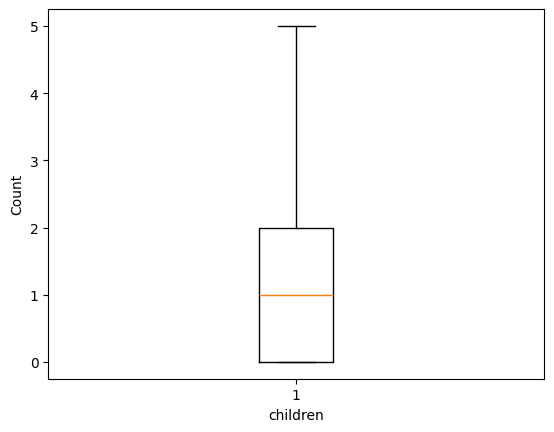

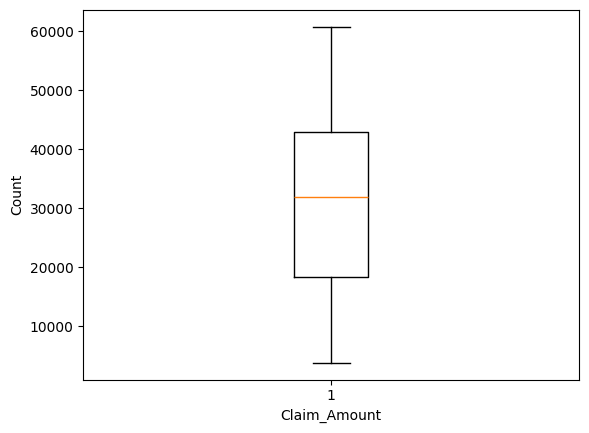

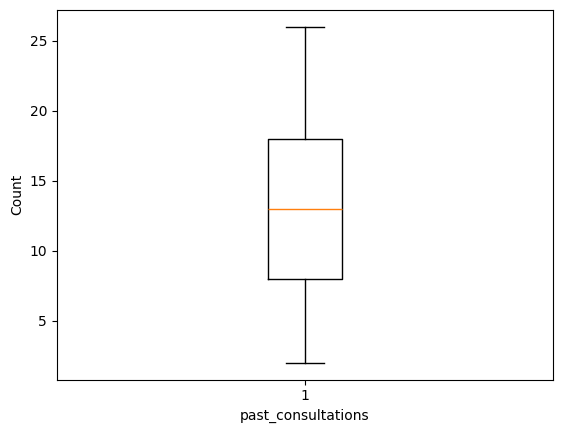

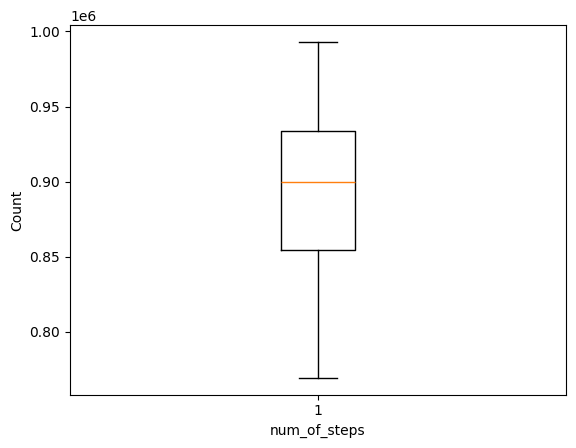

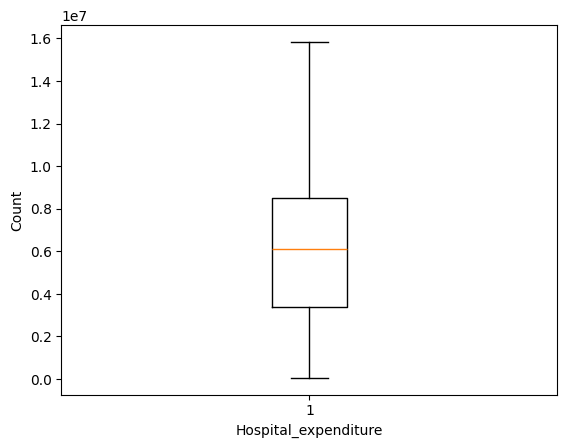

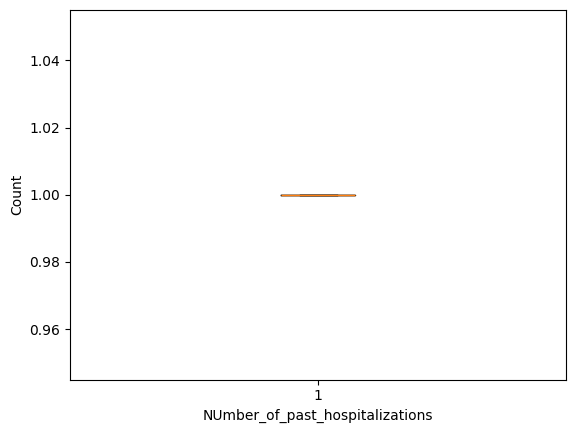

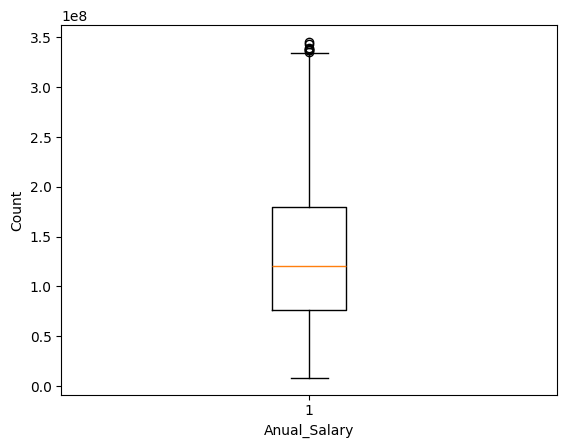

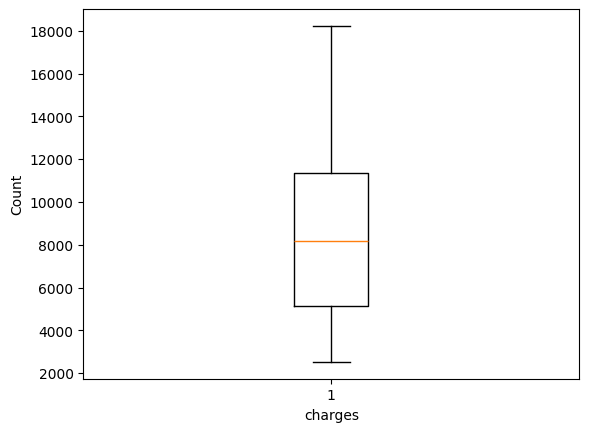

In [ ]:
for x in col_list:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel('Count')
  plt.show()

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,female,23.650,1.0,no,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,southeast,17626.23951
1019,28.0,male,23.980,3.0,yes,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,southeast,17663.14420
1021,25.0,female,41.325,0.0,no,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,northeast,17878.90068
1024,21.0,male,25.700,4.0,yes,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,southwest,17942.10600


In [ ]:
# [35,40,32,30,28,5,85,96]

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,female,23.650,1.0,no,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,southeast,17626.23951
1019,28.0,male,23.980,3.0,yes,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,southeast,17663.14420
1021,25.0,female,41.325,0.0,no,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,northeast,17878.90068
1024,21.0,male,25.700,4.0,yes,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,southwest,17942.10600


# Label Encoding

In [ ]:
# This can be a possibility the categorical columns are affecting our target column.
# But my model does not understand categorical values?
# Now I need to convert my categorical columns into numeric columns.

In [ ]:
# Label Encoding -> Used to convert your categorical column into numerical columns.
# It follows alphabetical order.

# Black -> LE ->   0
# Green -> LE ->   2
# Blue -> LE ->    1
# Red -> LE ->     4
# Blue -> LE ->    1
# Green  -> LE ->  2
# Grey -> LE ->    3

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
for x in col_list:
  if df[x].dtypes=='object':
    df[x] = le.fit_transform(df[x])

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2,17626.23951
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2,17663.14420
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0,17878.90068
1024,21.0,1,25.700,4.0,1,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,3,17942.10600


# **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# x_train -> Training questions  independent columns
# y_train -> Training answers    dependent column
# x_test -> Testing questions of independent columns (some rows that I won't pass to the model)
# y_test -> Testing answers of dependent column (To analyse the performance of the model)

In [ ]:
X = df.iloc[:,:12]
Y = df.iloc[:,-1]

In [ ]:
X # Independent Columns

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0
1024,21.0,1,25.700,4.0,1,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,3


In [ ]:
Y # Dependent Column

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1018,17626.23951
1019,17663.14420
1021,17878.90068
1024,17942.10600


In [ ]:
x_train , x_test , y_train, y_test = train_test_split(X,Y,test_size=0.25)   #train_size = 0.75

In [ ]:
x_train   #Training data (questions)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
752,55.0,0,30.500,0.0,0,33948.24503,14.0,937388.0,2852368.952,1.0,1.322794e+08,3
821,53.0,0,23.750,2.0,0,46064.51174,11.0,937674.0,4698591.425,1.0,1.628755e+08,0
534,41.0,0,31.635,1.0,0,48195.73809,4.0,887149.0,7173071.857,1.0,1.410664e+08,0
527,37.0,0,27.740,3.0,0,22226.93741,11.0,872849.0,8008598.785,1.0,1.116338e+08,1
627,49.0,1,22.515,0.0,0,49140.25422,10.0,898863.0,4776407.417,1.0,9.172299e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,19.0,1,29.070,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1
511,38.0,0,28.000,3.0,0,15547.62017,18.0,901940.0,8495017.378,1.0,1.015986e+08,3
292,28.0,0,26.510,2.0,0,15024.52722,3.0,838424.0,9950954.420,1.0,1.925496e+07,2
634,46.0,0,33.725,1.0,0,16550.03613,5.0,895133.0,9304818.572,1.0,1.398843e+08,0


In [ ]:
y_train   #training data answers.

,charges
752,10704.47000
821,11729.67950
534,7358.17565
527,7281.50560
627,8688.85885
...,...
1013,17352.68030
511,7151.09200
292,4340.44090
634,8823.98575


In [ ]:
x_test  #Testing data. after building the model I will test my model with this data.

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
425,38.000000,0,28.930,1.0,0,43317.28541,18.0,859925.0,6.185969e+06,1.0,6.815338e+07,2
530,43.000000,0,29.900,1.0,0,45529.66627,11.0,887768.0,7.018370e+06,1.0,9.582650e+07,3
908,60.000000,1,24.320,1.0,0,32559.21065,9.0,935446.0,1.193068e+07,1.0,2.610378e+08,1
469,33.000000,0,36.290,3.0,0,22587.51601,13.0,879884.0,9.167072e+06,1.0,9.830547e+07,0
784,52.000000,0,31.730,2.0,0,45087.10054,14.0,915453.0,1.004051e+07,1.0,1.594934e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...
931,58.000000,0,31.825,2.0,0,53872.20170,7.0,950356.0,7.294381e+06,1.0,2.232705e+08,0
750,56.000000,1,40.300,0.0,0,37808.80308,6.0,922309.0,7.062198e+06,1.0,1.632791e+08,3
199,21.000000,0,16.815,1.0,0,16615.52026,4.0,811626.0,2.938533e+06,1.0,9.217500e+07,0
656,46.000000,0,19.950,2.0,0,29381.57518,17.0,907168.0,2.600367e+06,1.0,1.401734e+08,1


In [ ]:
y_test   #When the model will predict the values for us we will compare those values with y_test

,charges
425,5974.38470
530,7337.74800
908,13112.60480
469,6551.75010
784,11187.65670
...,...
931,13607.36875
750,10602.38500
199,3167.45585
656,9193.83850


In [ ]:
linear_model  = LinearRegression()

In [ ]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Now we need to test the data to check what values my model can predict

model_predicted = linear_model.predict(x_test)

In [ ]:
model_predicted

array([ 5770.33451959,  7634.73900695, 12767.41734598,  7117.08510711,
       10207.92303118,  1503.91800676,  8738.86339571, 14401.53489534,
       10979.64543672,  3320.35534806,  8885.82975559,  6312.67166664,
        6256.58480412,  2807.50995125, 15004.912674  ,  9973.24292354,
       12155.19753029,  7339.17124881,  2685.40753936, 11427.26845176,
       10243.39414787,  8588.37517111,  8745.58101838,  2668.58805293,
       10362.63579107,  6414.17315657,  3560.37918735,  6192.53483979,
        8628.66066881,  9673.79490289,  6102.77362982, 12039.35195894,
        3288.05759541,  2131.16231222,  4450.44058848, 10014.23285363,
        5182.2673789 ,  1844.5000793 ,  9764.49933624, 11899.57963818,
        8011.15569194, 11349.60682426,  5315.69577045,  4506.19344041,
       12488.72132914, 17266.07247515,   450.21290434,  9330.4505931 ,
        9341.11491071, 13434.66940454,  6076.29742771,  6290.90416052,
        1897.01691473, 12865.77933425,  9589.73383488,  7981.98520304,
      

In [ ]:
y_test

,charges
425,5974.38470
530,7337.74800
908,13112.60480
469,6551.75010
784,11187.65670
...,...
931,13607.36875
750,10602.38500
199,3167.45585
656,9193.83850


In [ ]:
# MSE -> Mean Squared Error
# RMSE -> Root Mean Squared Error
# r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,model_predicted)

In [ ]:
mse

580640.8722696669

In [ ]:
rmse = np.sqrt(mse)
rmse

761.9979476807447

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_accuracy = r2_score(y_test,model_predicted)
r2_accuracy*100

95.94037654762447

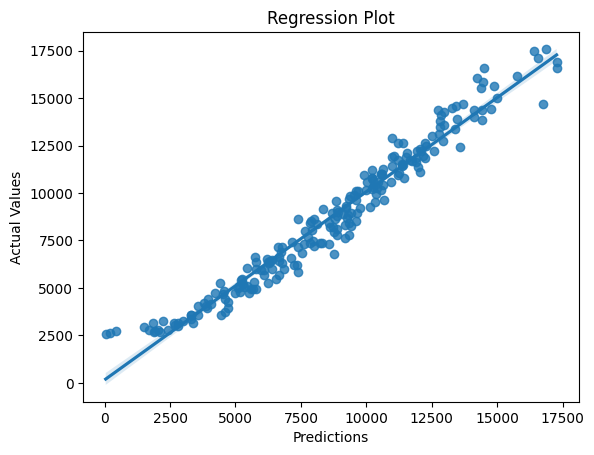

In [ ]:
sns.regplot(x=model_predicted,y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Regression Plot')
plt.show()

In [ ]:
# Whenever we have to check the error rate of model we use mse (Mean squared error)
# Rmse -> Sqrt of mse

In [ ]:
# 7 -> 8 8.5
# 1.5